<center><img src="https://news.shack15.com/wp-content/uploads/2016/10/R-language-logo.png" width="600"></center>

# Programa de Especialización en R

## Tema: Clasificación Basado en Árboles 

### Prof. Manuel Sigüeñas, M.Sc.(c)
[msguenas@socialdata-peru.com](msguenas@socialdata-peru.com)

<a id='beginning'></a>

1. [Aspectos Generales](#part1)

    a. [Partes de un Árbol de Decisión I](#part2)<br>
    b. [Características](#part3)<br>
    c. [¿Por qué usar Árboles de Decisión?](#part4)<br>
<br>

2. [Constucción del Modelo.](#part5)<br>

    a. [Intrducción en Árboles de Decisión I](#part6)<br>
    b. [Construcción I](#part7)<br>
    c. [Múltiples árboles de Decisión I](#part8)<br>
    d. [Inducción I](#part9)<br>
    e. [Especificación de la condición a evaluar I](#part10)<br>
    f. [Selección del Atributo I](#part11)<br>
    g. [Medidas de Impureza](#part12)<br>
    h. [Impureza del Árbol](#part13)<br>
    i. [Mejor Participación ](#part14)<br>
<br>

3. [Árboles de Decisión en R](#part15)<br>
    
    a. [La librería rpart](#part16)<br>
    b. [Medidas de Impureza](#part12)<br>
    c. [Opciones de control de rpart](#part17)<br>
    d. [Recortar el árbol](#part18)<br>
<br>

In [2]:
library(png)
library(grid)

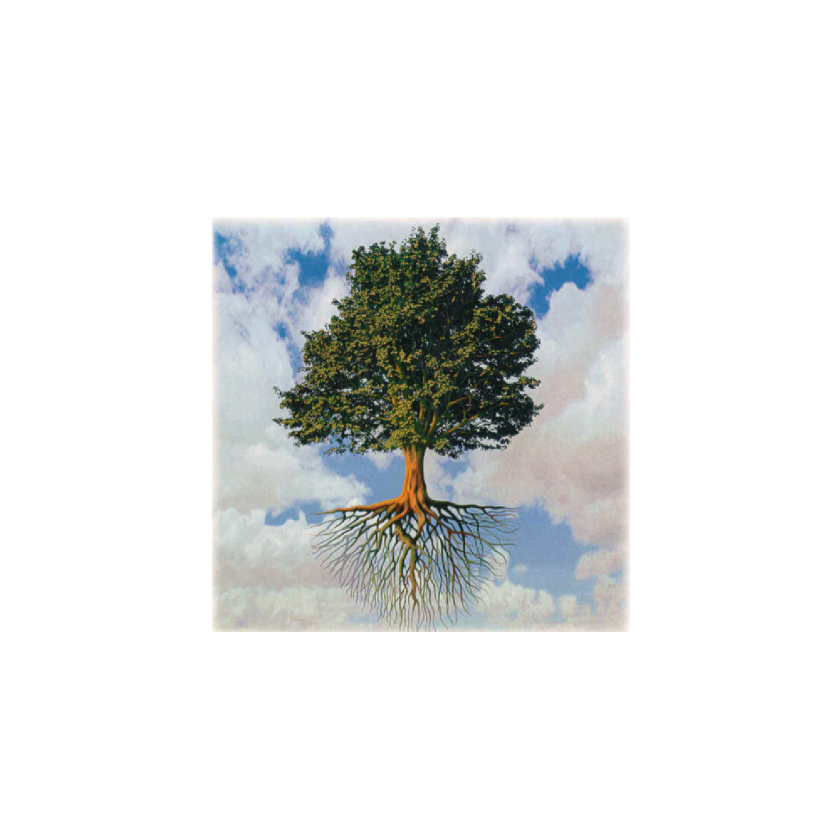

In [3]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen1.png'), width=0.5)

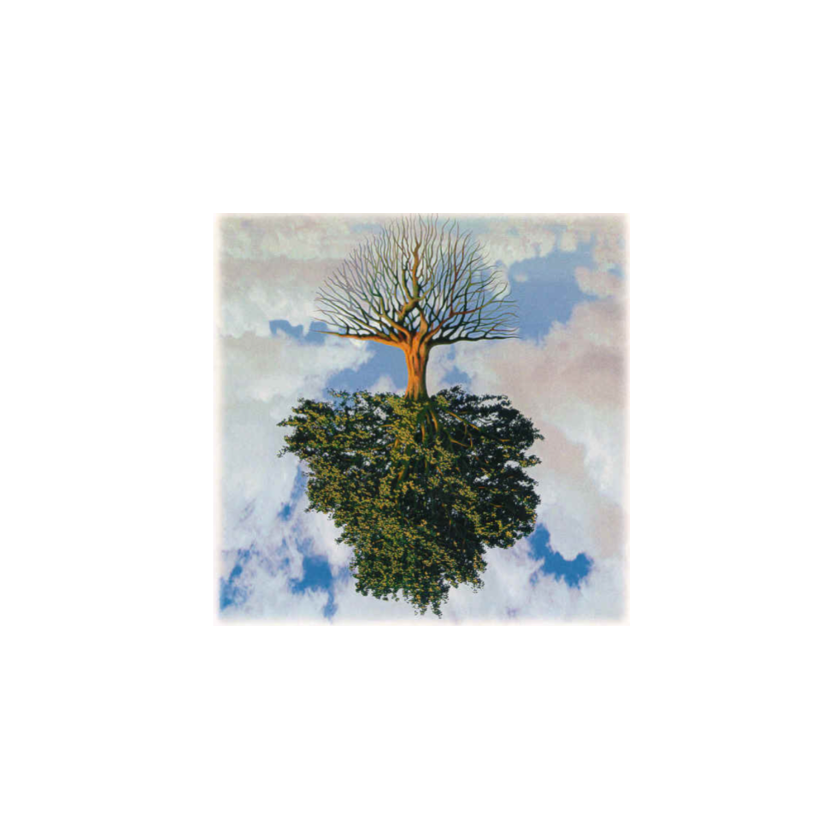

In [7]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen2.png'), width=0.5)

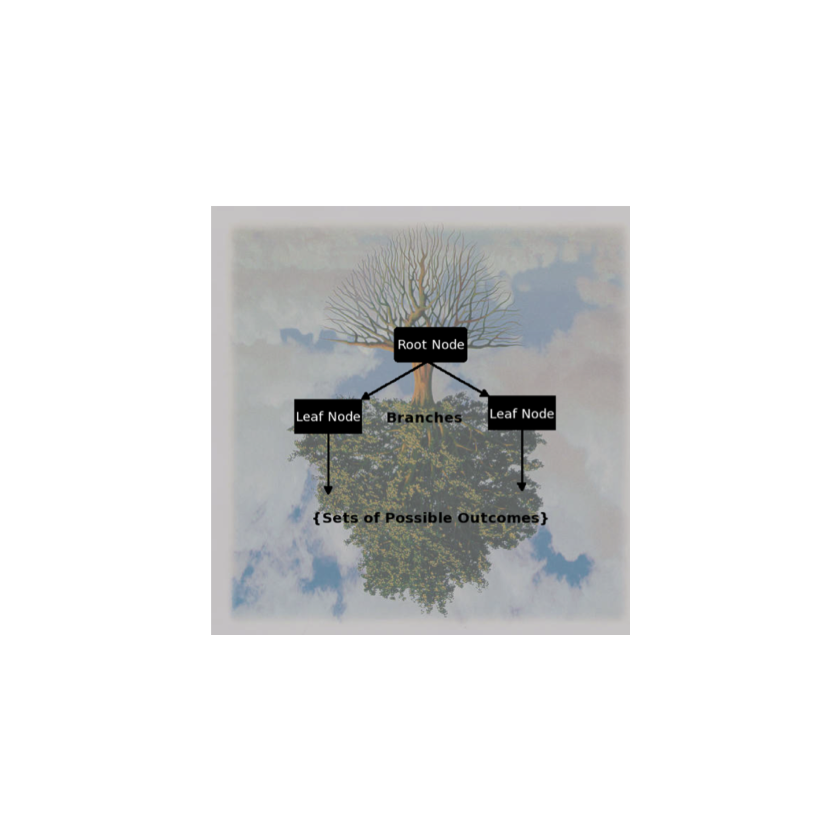

In [8]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen3.png'), width=0.5)

____
[Ir a inicio](#beginning)

<a id='part1'></a>
# 1. Aspectos Generales

<a id='part2'></a>
## Partes de un Árbol de Decisión I

- **Nodo Interno (Root Node):** denota una prueba sobre un atributo.
<br>

- **Rama (Branch):** corresponde un valor de atributo y representa el resultado de una prueba.
<br>

- **Nodo Terminal (Leaf Node):** representa un etiqueta de clase o de distribución de clase.
<br>

- Cada camino es una conjunción de valores de atributo.

**Ejemplo de Árbol de Decisión**

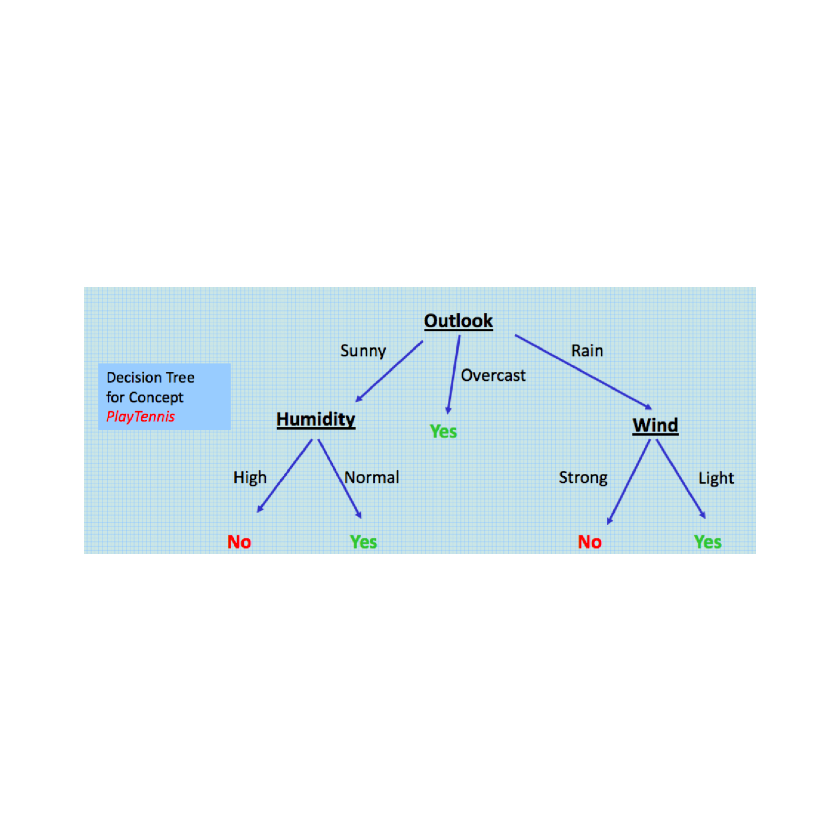

In [23]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen4.png'), width=0.8)

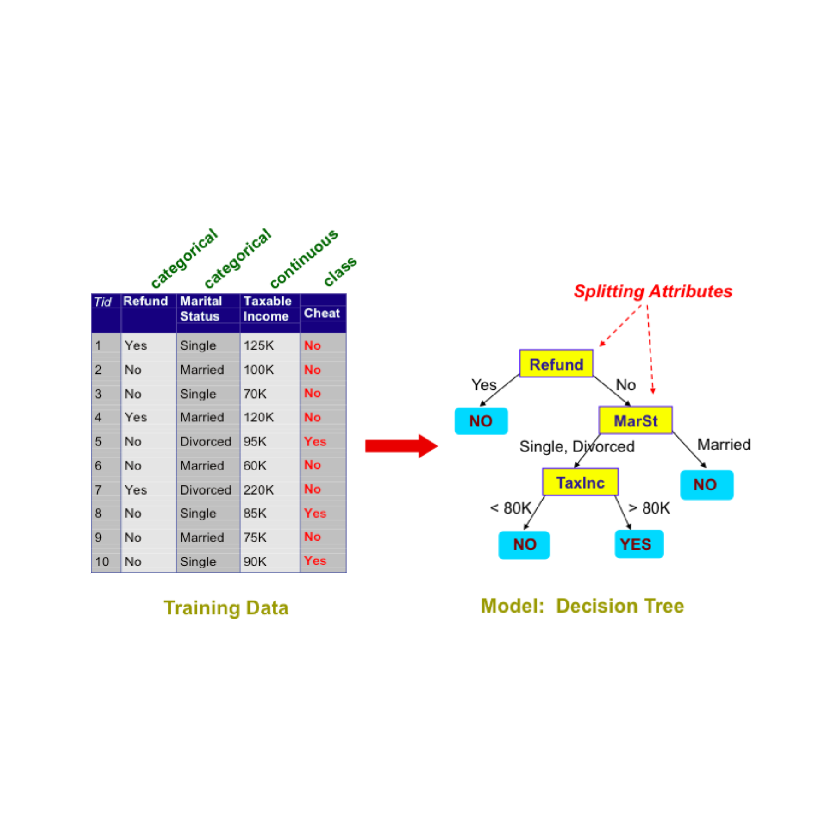

In [24]:
grid.raster(readPNG("D:/R/3. Nivel III/1/imagenes/imagen5.png"), width=0.8)

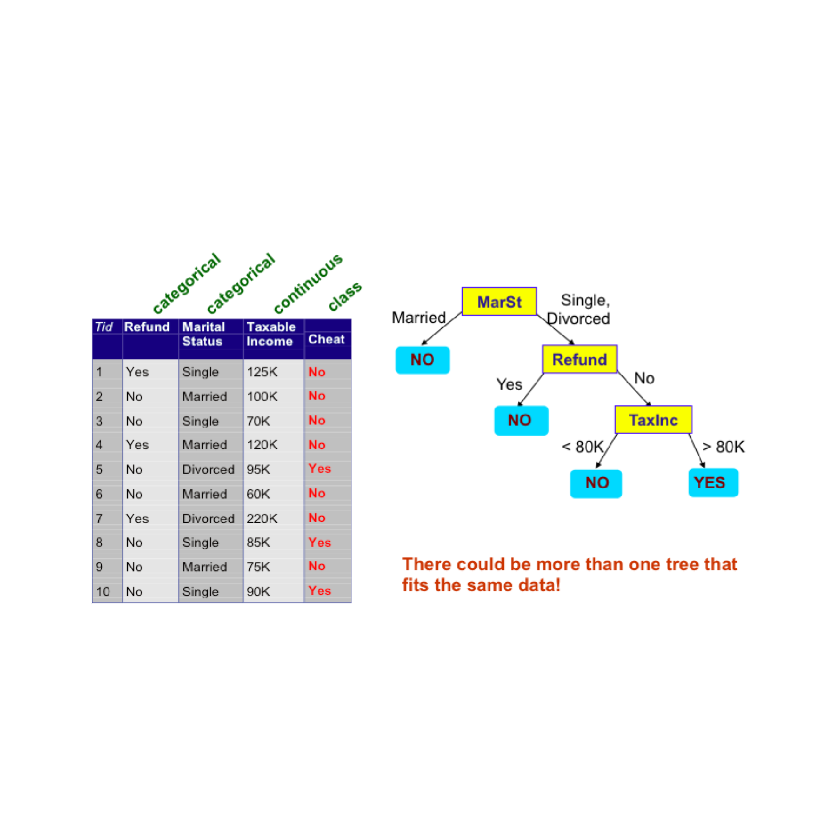

In [25]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen6.png'), width=0.8)

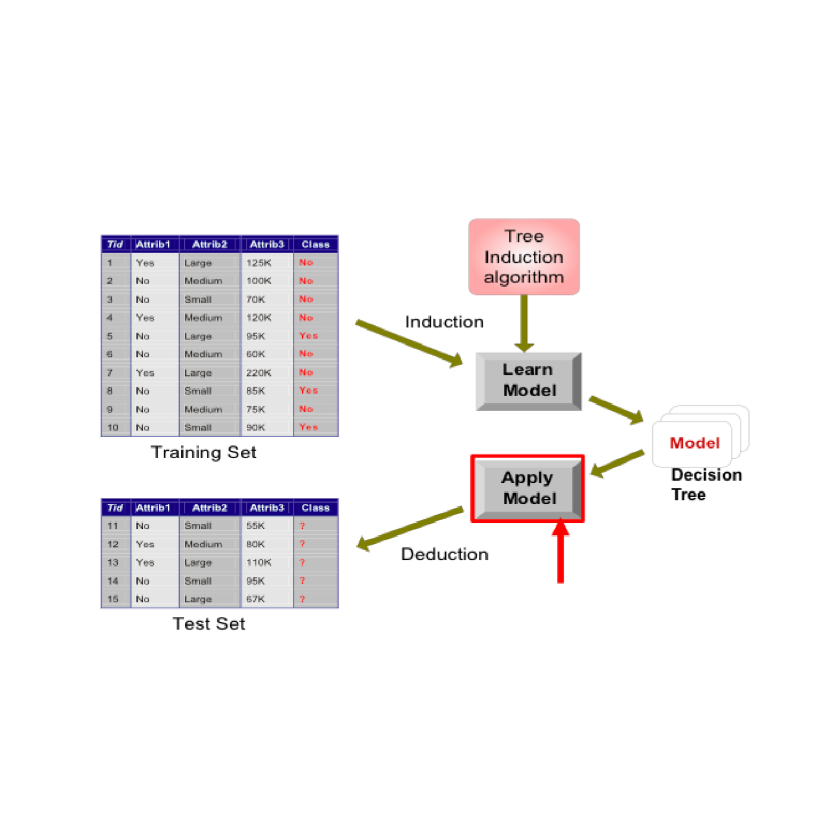

In [26]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen7.png'), width=0.8)

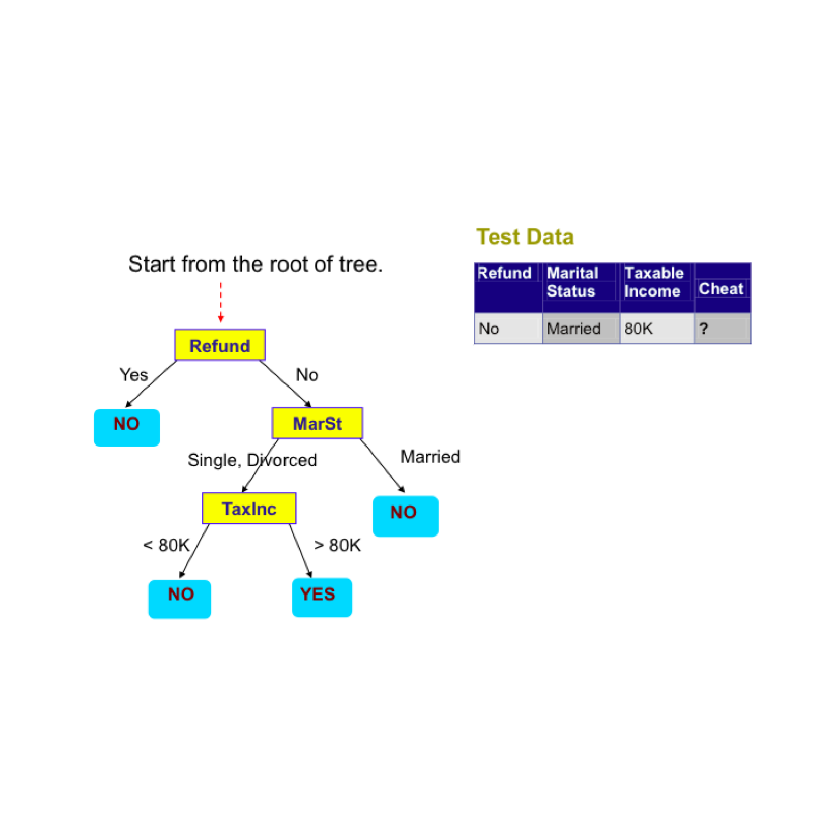

In [27]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen8.png'), width=0.8)

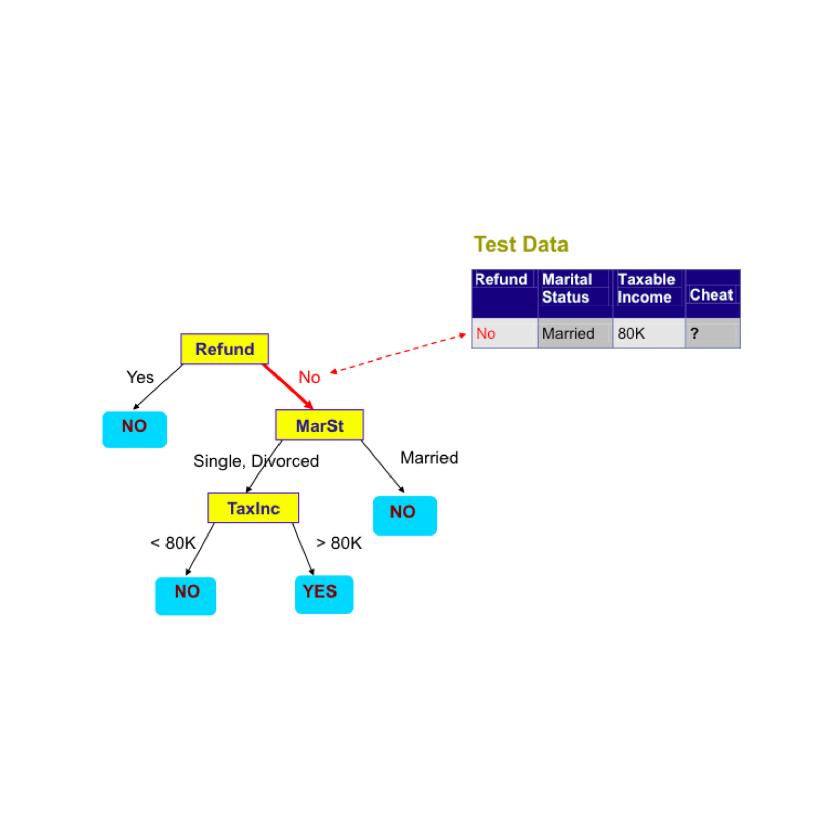

In [28]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen9.png'), width=0.8)

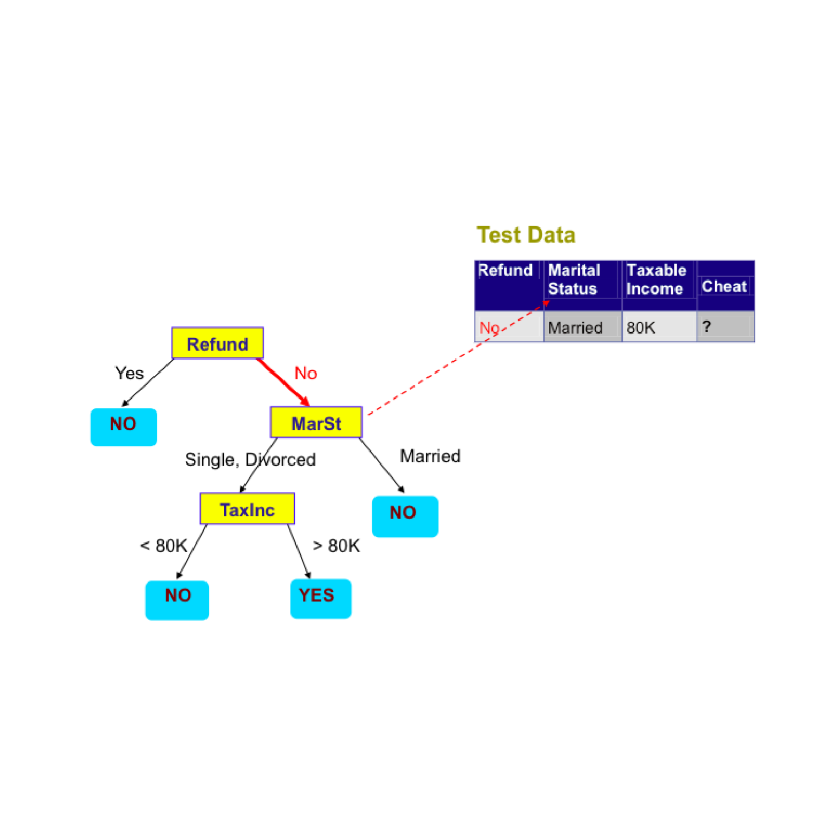

In [30]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen10.png'), width=0.8)

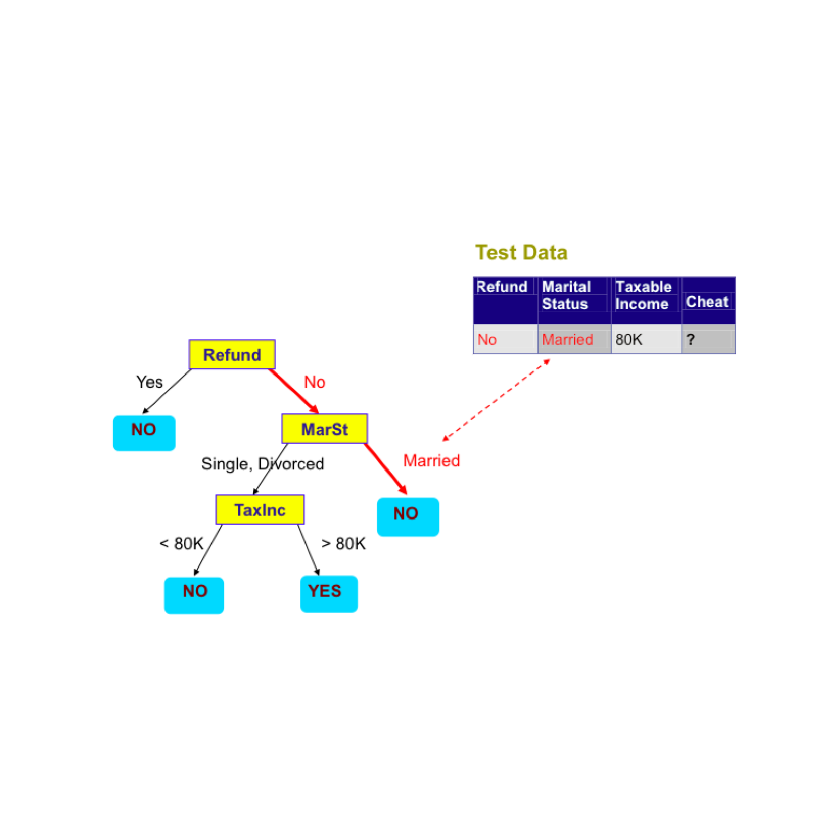

In [31]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen11.png'), width=0.8)

<a id='part3'></a>
## Características

Los Árboles de Decisión son atractivos de usar Minería de datos debido a que:
<br>

- Se usan mucho por interpretabilidad
- Para evaluar que variables son importantes y como ellas interactúan una con otra.
- Los resultados se pueden expresar fácilmente mediante reglas
- Son robustos a los outliers.
- Los algoritmos tienen una forma especial de tratar valores faltantes: como un nivel aparte de la variable objetiv.
- Los valores faltante pueden ser agrupados con otros valores y ser tratados en un nodo.
- Pueden realizarse imputaciones.

<a id='part4'></a>
## ¿Por qué usar Árboles de Decisión?

Los árboles de decisión son atractivos de usar Minería de datos debido a que:
<br>

- Tienen una reoresentacipon intuitiva, fácil de ser asimilado por humanos.
- Pueden ser rápidamente construidos a diferencia de otros métodos.
- La precisión de los clasificadores basados en árboles es comparables o superior a otros modelos.

<a id='part5'></a>
# 2. Constucción del Modelo.

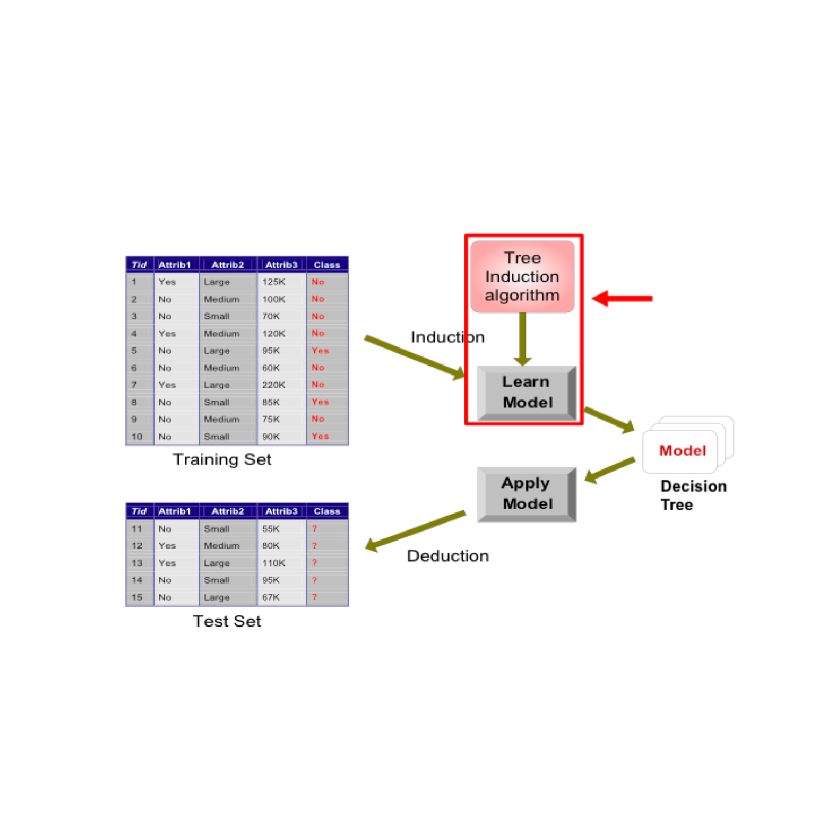

In [32]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen12.png'), width=0.8)

<a id='part6'></a>
## Intrducción en Árboles de Decisión I

La generación de un árbol de decisión consiste de dos fases.
<br>

<br>

- Construcción del Árbol
<br>

    - Al inicio, todas las observaciones de entrenamientos están en la raiz.
    - Se realizan particiones recursivas basadas en los atributos seleccionados.
<br>


- Poda del Árbol
<br>

    - Identifican y remueven ramas que causen ruido o tengan outliers.

<a id='part7'></a>
## Construcción I

Un árbol de decisión particiona el espacio de variables predictoras en un conjunto de hiper-rectangulos y en cada uno de ellos ajusta un modelo sencillo, generalmente una constante. Es decir, $y=c$, donde $y$ es la variables de respuesta. La construción de un árbol de decisión se basa en cuatro elementos.
<br>

- Un conjunto de preguntas binarias $Q$ de la forma $x \in A$
- El método usado para particionar los nodos.
- La estrategia requeridad para el crecimiento del árbol.
- La asignación de cada nodo terminal a una clase de la variable respuesta.

<br>

Las diferencias entre los algoritmoa para construir árboles se hallan en la regla para particionar los nodos, la estrategia para podar los árboles, y el tratamiento de valores perdidos **("missing values")**

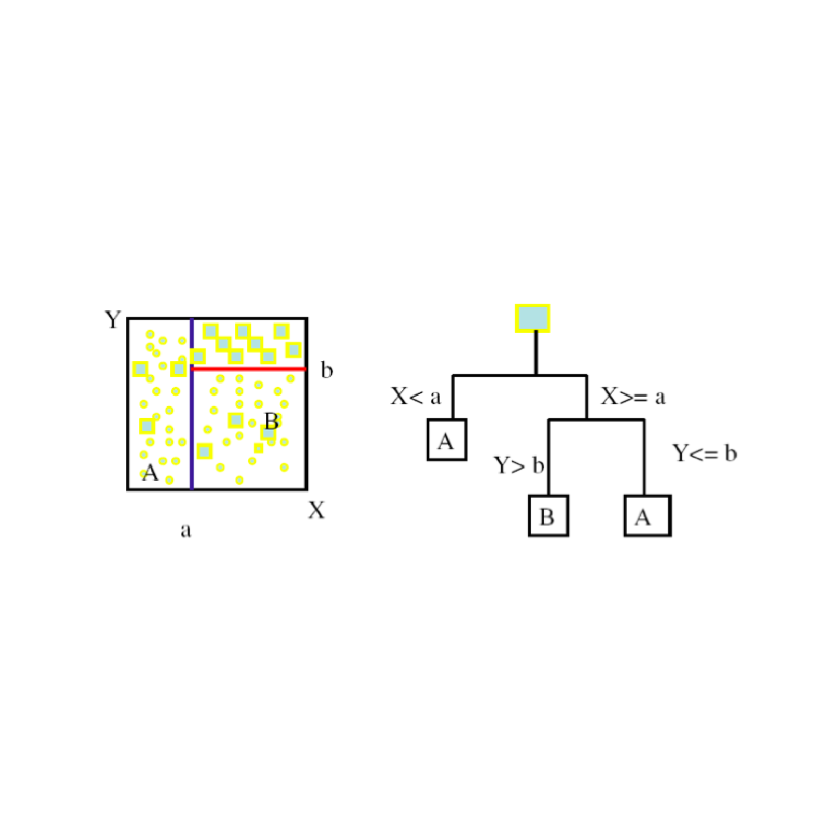

In [33]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen13.png'), width=0.8)

<a id='part8'></a>
## Múltiples árboles de Decisión I

- Si los atributos son adecuados, es posible construir un árbol de decisión que clasifica correctamente a todas las observaciones de entrenamiento.
- Pueden existir muchos árboles de decisión correctos.
- Muchos algoritmos, elegir el árbol más simple (Navaja de Occam)
<br>

    - El principio establece que no se deben realizar más asunciones que el mínimo necesario.
    - El árbol más simple captura la máxima generalización y representa las relaciones más esenciales.

**Ejemplo de Play Tennis**

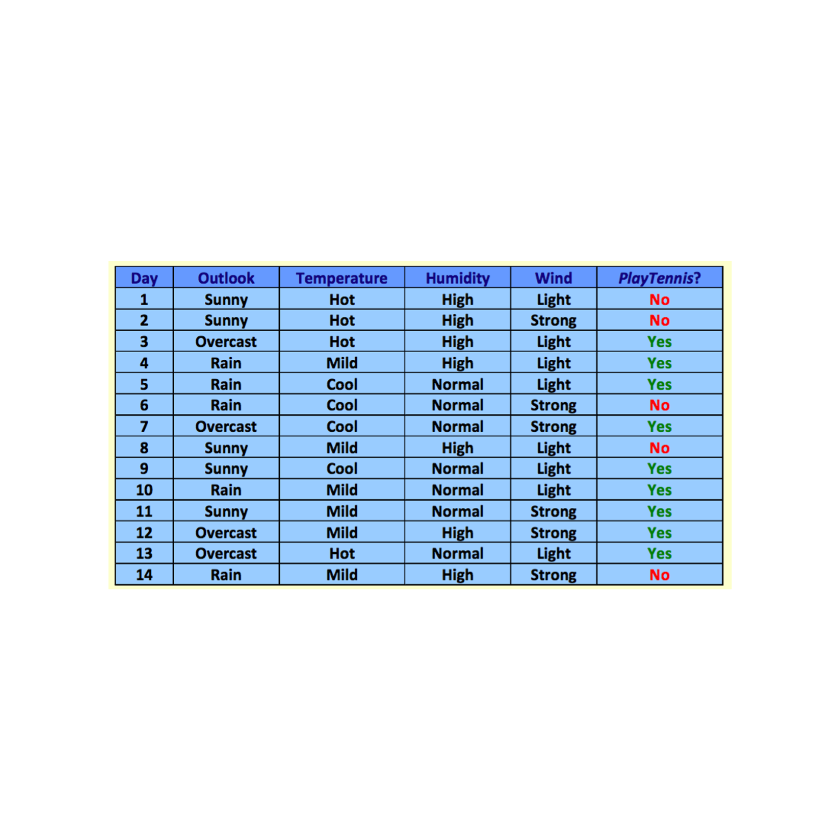

In [35]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen14.png'), width=0.8)

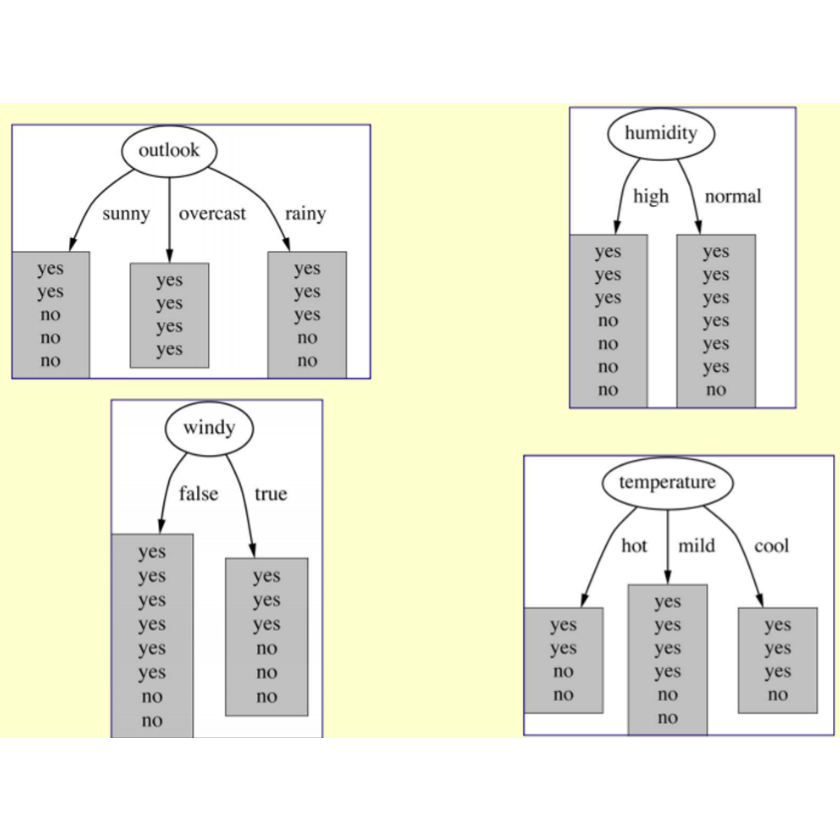

In [36]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen15.png'), width=1)

<a id='part9'></a>
## Inducción I

Estrategia:
- Dividir los registros basados en un atributo de prueba que optimice cierto criterio.
<br>

Discusión:
- Determinar como dividir los registros
    - ¿Cómo especificar la condicción a evaluar?
    - ¿Cómo determinar la mejor partición?
<br>


- Determinar el criterio de parada.

<a id='part10'></a>
## Especificación de la condición a evaluar I

Depende del tipo de atributo.
<br>

- Nominal 
- Ordinal
- Continuo
<br>

Depende del número de divisiones
<br>

- Binaria
- Múltiple

<a id='part11'></a>
## Selección del Atributo I

Muchas variantes:
<br>

- Machines Learning: ID2 (Iterative Dichotomizer), C4.5 (Quinal 86, 93))
- Estadística: CART (Classificaction and Regression Trees) (Breiman et al 84)
- Reconocimiento de patrones: CHAIS (Chi-squared Automated Interaction Detection) (Magidson 94)
<br>

Pincipal diferencia: Criterio de división
<br>

- ¿Qué atributo probar en cada nodo del árbol? El atributo que es más útil par la clasificación.

<a id='part12'></a>
## Medidas de Impureza

- **Coeficiente de Gini** Para el nodo $t$ y en cn $J$ clases
$$i_G(t)=\sum^J_{j=1}p(j|t)[1-p(j|t)]$$
$$= 1 - \sum^J_{j=1}p(j|t)^2$$
<br>

- **Entropía** Para el nodo $t$ y con $J$ clases
$$i_e(t)=-\sum^J_{j=1}p(j|t)log[p(j|t)]$$

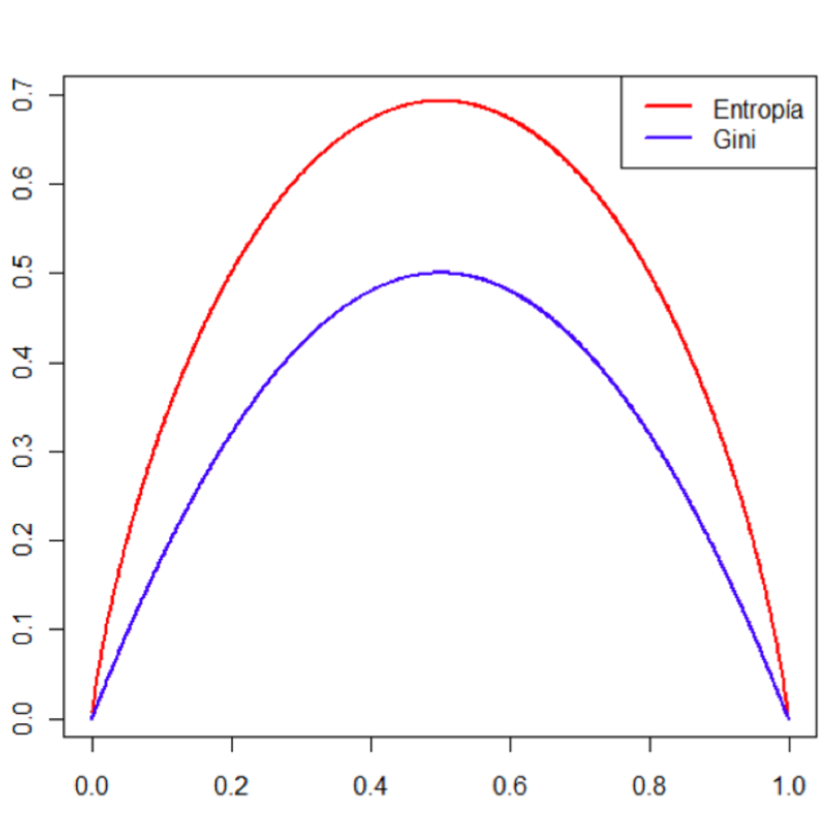

In [37]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen16.png'), width=1)

<a id='part13'></a>
## Impureza del Árbol

$$I(T)=\sum_{t\in T}i(t)p(t)$$
<br>

donde $T$ es el conjunto de nodos terminales del árbol y $p(t)$ es la probabilidad que un caso esté en el nodo t..

**Ejemplo:** Cálculo de Impureza

Sin hacer ninguna partición tenemos que 24 alumnos aprobaron (clase P) y 8 alumnos desaprobaron (clase F).
$$\begin{array}{crl}
P & 24 \\
F & 8 
\end{array}$$

<br>

$$i_G(t) = 1 - \left(\frac{24}{32}\right)^2 - \left(\frac{8}{32}\right)^2 = 0.375$$
<br> 
$$i_E(t) = \frac{24}{32} log \left(\frac{24}{32}\right)+\frac{8}{32}log \left(\frac{8}{32}\right) = 0.5623$$

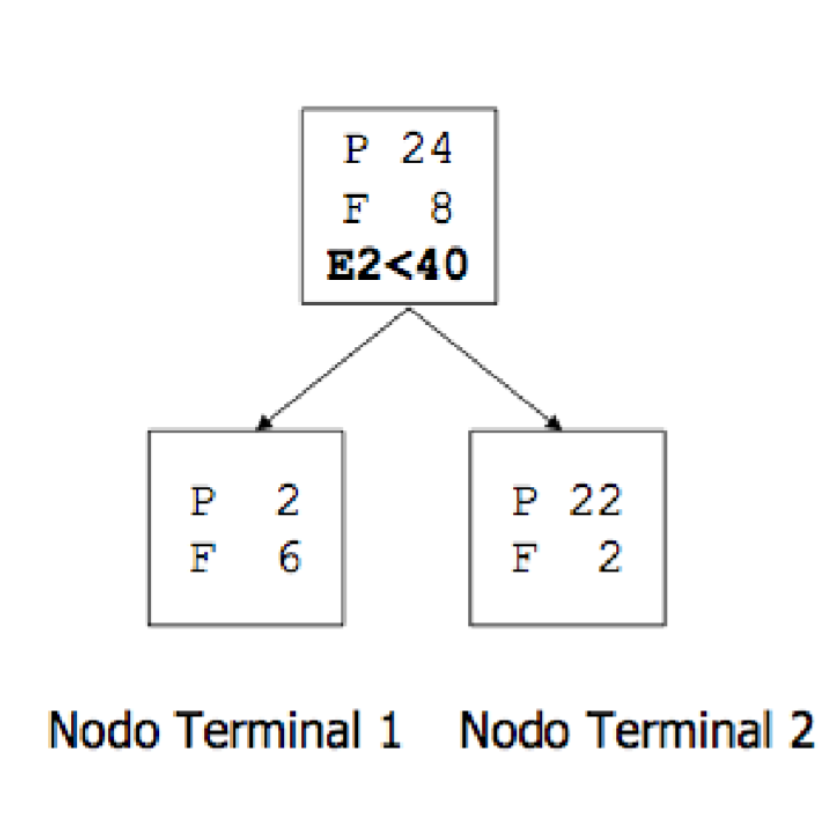

In [38]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen17.png'), width=1)

- Partición 1: $E2<40$
<br>
$$\begin{array}{crl}
i_G(1)=0,3750 & i_G(2)=0,1528 \\
i_E(1)= 0.5623 & i_E(2)=0,2868\\
p(1)=0,25 & p(2)=0,75
\end{array}$$
<br>

- Impureza del árbol
<br>

$I_G(T) = 0,2083$<br>
$I_E(T) = 0,3557$

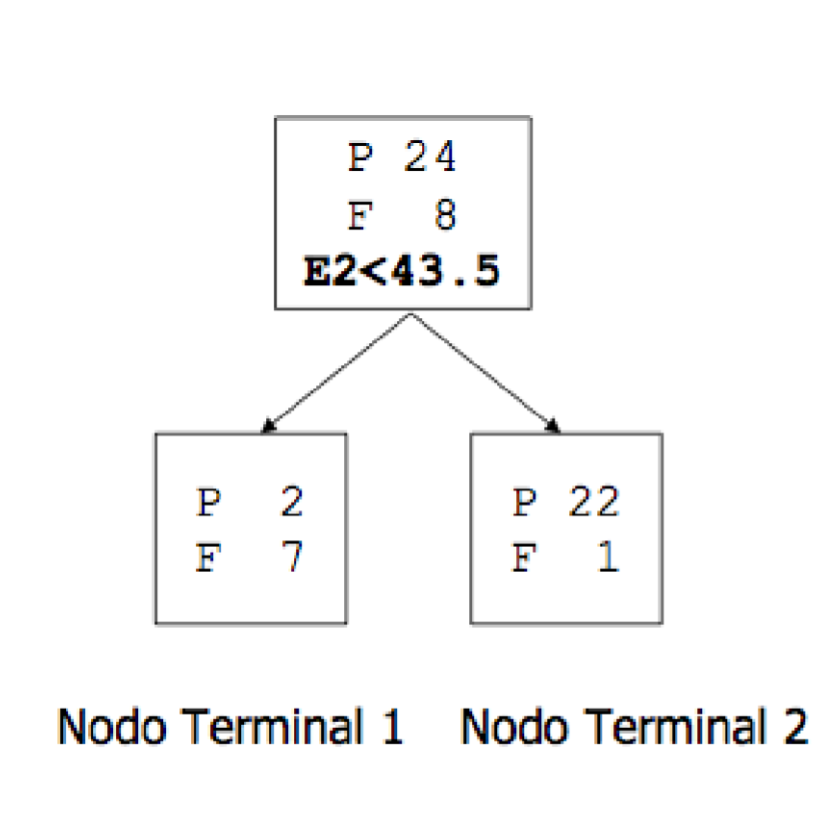

In [39]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen18.png'), width=1)

- Partición 2: $E2< 43,5$
<br>
$$\begin{array}{crl}
i_G(1) = 0,3457 & i_G(2) = 0,0832 \\
i_E(1 = 0,5297 & i_E(2) = 0,1788 \\
p(1) = 0,28125 & p(2) = 0,71875
\end{array}$$
<br>

- Impureza del árbol
<br>
$I_G(T) = 0,1570$
$I_E(T) = 0,2775$
<br>


- Se obtiene menor impureza con esta partición
  

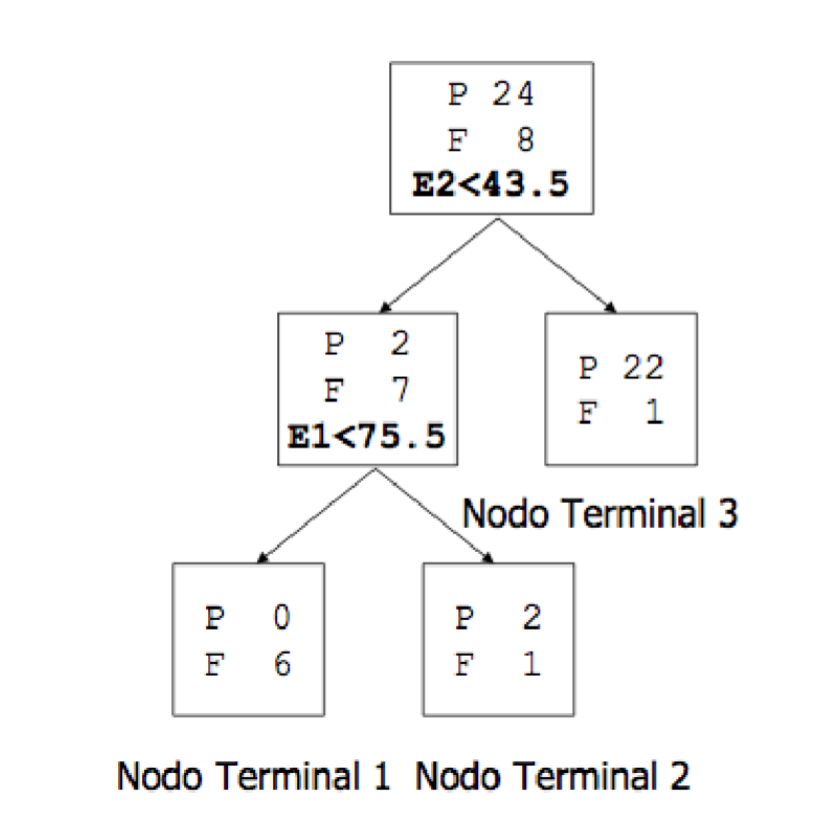

In [41]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen19.png'), width=0.8)

- Impureza por nodo.
<br>
$$\begin{array}{crl}
i_G(1) = 0 & i_G(2) = 0.4444 & i_G(3) = 0,0832\\
i_E(1) = 0 & i_E(2) = 0,6365 & i_E(3) = 0,1788\\
p(1) = 0,1875 & p(2) = 0,09375 & p(3) = 0,71875
\end{array}$$
<br>

- Impureza del árbol
<br>
$I_G(T) = 0,1014$ <br>
$I_E(T) = 0,1882$

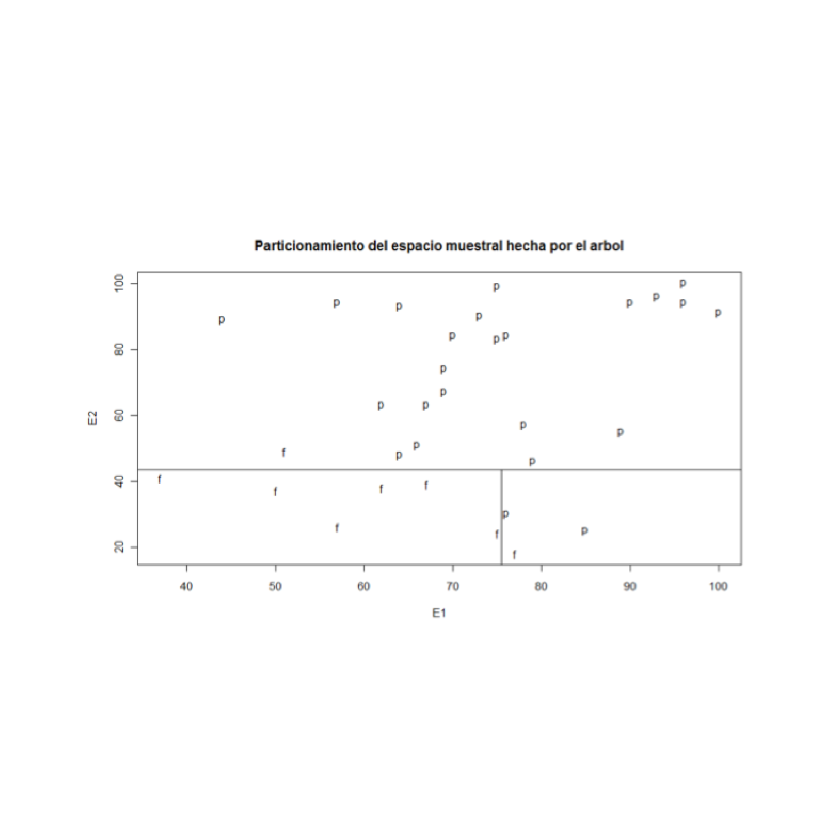

In [42]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen20.png'), width=0.8)

<a id='part14'></a>
## Mejor Participación 

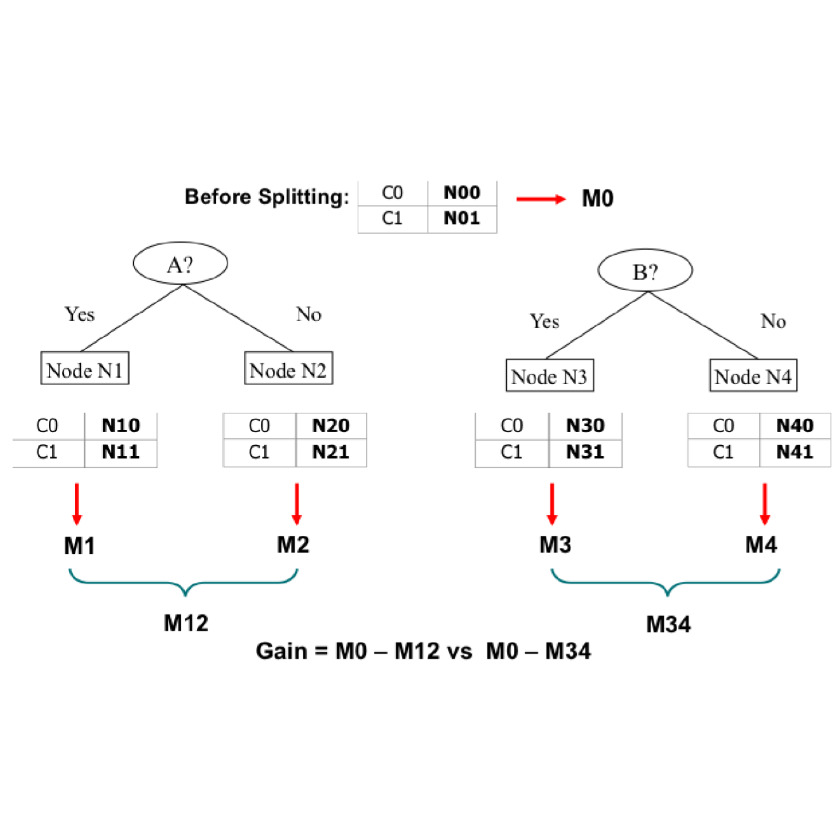

In [43]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen21.png'), width=1)

<a id='part15'></a>
# Árboles de Decisión en R

<a id='part16'></a>
## La librería rpart

En se puede utilizar la librería **rpart** con la función rpart cuya sintaxis es: 
<br>

rpart(formula, data, method)
<br>

- $formula$: formula indicando las variables respuesta y las predictoras.
- $data$: conjunto de datos a ser utilizado.
- se usa $"class"$ para árboles de decisión.}

<a id='part17'></a>
## Opciones de control de rpart

- **minsplit**: fija el número mínimo de observaciones en un nodo para que esre sea dividido. Esta opción por defecto es 20.
<br>

- **minbucket**: indica el número mínimo de observaciones en cualquier nodo terminal. Por defecto esta opción es el valor redondeado de $minsplit/ 3$. 
<br>

- **cp:** prámetro de complejidad. Indica que si el criterio de impureza no es reducido es mas de cp*100% entonces se para. Por defecto cp=.01. Es decir, la reducciín en la impureza del nodo terminal deber ser de al menos 1% de la impureza inicial.
<br>

- **maxdepth:** condiciona la profundidad máxima del arbol. Por defecto está establecida como 30.

### Para graficar el árbol

- plot(objeto, margin = 0.25)
<br>

- text(objeto, use.n = T)
<br>

Argumentos:
<br>

- $objeto$: salida rpart
<br>

- $margin$ margen del gráfico del árbol
<br>

- $use.n$ si es $T$ adiciona al gráfico cuantos elementos hay de cada clase. 

### Para realizar predicciones se utiliza:

- predict(object, newdata, type)
<br>

Argumentos:
<br>

- $object$: salida rpart.
<br>

- $newdata$: conjunto de datos con los cuales se va predecir
<br>

- $type:$ tipo de salida ("clas" retorna la clase, "pro" retorna matriz de probabilidades de las clases)

<a id='part18'></a>
## Recortar el árbol

- Hacer crecer un árbol demasiado puede crear problemas se sobreajuste (overfitting).
<br>

- La función cp, denominado parámetro de complejidad, indica que se descartará cualquier partición que no disminuya la impureza por un factor de cp.
<br>

- La opción cp, denominado parámetro de complejidad, indica que descartará cualquier partición que no disminuya la impureza por un facto de cp.
<br>

- arbol6 = prune(arbol4,cp=.1)
<br>

- drawTreeNodes(arbol6)

Para decidir que parámetro de complejidad escoger, se utiliza las funciones:
<br>

- printcp(arbol4)
<br>

- Root node erorr: $\frac{145}{345} = 0.42029$

<a id='part19'></a>
## Prioris y Matriz de pérdidas

- En el caso que tengamos un conjunto de datos en que una clase este mal representada la función $rpart$ permite incorporar probabilidades a priori y también una matriz de perdidas

<a id='part20'></a>
## Árboles por Inferencia Condicional I

- Uno de los principales problemas de los algoritmos tradicionales es que pueden sufrir de sobreajuste y pueden exhibir sesgo al seleccionar variables con muchas particiones posibles.
<br>

- Otro problema es que no usan ningún concepto de inferencia estadística que permita distinguir entre una ganancia significativa de la información medida (**Mingers, 1989**)

- De acuerdo a Hothorn, Hornik y Zeileis (2005) el método de árboles por inferencia condicional (implementado en la función **ctree** de la librería party) es insesgado en el sentido que no favorece a variables que tengan mayores putos de corte, como si lo hacen los métodos usuales para la construcción de árboles de decisión basados en la maximización de una medida de información como el RPART implementando en la función rpart de la libreria rpart.

Pasos:
<br>

- Hacer un test global de independencia entre cada variable independiente con la variable respuesta.
<br>

- Seleccionar la variable con la mayor asociación. Esta asociación es medida por el pvalor.
<br>

- Encontrar un punto de corte en la variable seleccionada.
<br>

- Repetir hasta que no se puedan abrir más nodos.

Pasos:
<br>

- En el R está implementado en la librería party con la función ctree

<a id='part21'></a>
# Más Arboles de Decisión

<a id='part22'></a>
## Bagging

- Bootstrap es usado en muchas situaciones en las cuales es complicado o imposible calcular directamente la desviación estándar de una cantidad de interés
<br>

- Los árboles de decisión padecen por tener una gran varianza.
<br>

- Esto quiere decir que si nosotros dividimos la data de entrenamiento en dos partes de manera aleatoria y ajustamos un árbol de decisión en ambas mitades, los resultados pueden ser bastante diferentes.
<br>

- $Bootstrap aggregation$, or, $bagging$, es un procedimiento que busca reducir la varianza en un método de aprendizaje estadístico.

- Recordar: Data un conjunto de observaciones independientes $Z_1, ..., Z_n$,  cada uno con varianza $\sigma^2$, la varianza de la media $\bar{Z}$ de las observaciones reduce la varianza.
<br>

- En otras palabras, el promediar un conjunto de observaciones reduce la varianza.
<br>

- Una forma natural de reducir la varianza e incrementar la precisión en la predicción de un método de aprendizaje estadístico es tomar muchas muestras de entrenamiento de la población, contruir muchas muestras de entrenamiento de la población, construir un modelo predictivo por separado usando cada conjunto de entreenamiento y promediar los resultados de las predicciones.

- En otras palabras podemos calcular $\hat{f}^1(x),\hat{f}^2(x), ..., \hat{f}^B(x)$ usando B conjuntos de entrenamiento separados, y promediarlos para obtener un modelo de aprendizaje estadístico de baja varianza dado por:
$$\hat{f}_{avg}(x)=\frac{1}{B}\sum^B_{b=1}\hat{f}^b(x)$$
<br>

- Obivamente este enfoque no es práctico porque generalmente no tenemos acceso a múltiples repetidas de un sólo conjunto de entrenamiento.
<br>

- Bajo este enfoque generamos B diferentes muestras de entrenamiento por $bootstraping$.

- Se entrena el método en la b-ésima muestra de entrenamiento parta obtener $\hat{b}^{*b}(x)$ y finalmente promediar todas las predicciones obteniendo:
<br>

$$\hat{f}_{bag}(x)=\frac{1}{B}\sum^{B}_{b=1}\hat{f}^{*b}(x)$$
<br>

- El cual es llamado bagging
<br>

- El método anterior es utilizado en árboles de regresión. Para el caso de clasificación, se registra la clase predicha para cada observación en cada uno de los B árboles y se toma aquella con mayor frecuencia (voto mayoritario).

### Error de Estiamción $Out-of-Bag$ 

- Hay una forma sencilla de estimar el eror de estimación de un modelo agregado por bagging sin la necesidad de usar validación cruzada o usar el enfoque de usar una muestra de validación
<br>

- Es posible demostrar que, en promedio, cada árbol agregado por bagging usa el promedio larededor de dos tercios de las observaciones (ver James et al, capítulo 5).
<br>

- El tercio restante de las observaciones que no son usadas para ajustar el árbol son conocidas como las observaciones $out-of-bag$ (OOB).
<br>

- Podemos predecir la respuesta para la i-esima observación usando cada uno de los árboles en que dicha observación estaba OOB.

- Esto da alerededor de $B/3$ predicciones para la i-ésima observación.
<br>

- Para obtener una predicción individual de la i-ésima observación se usa la estrategia de voto mayoritario.
<br>

- La predicción OOB puede ser obtenida de esta forma para cada una de las **n** observaciones, para los cuales se calcula el error de clasificación.
<br>

- El error OOB resultante es una estiamción válida del error de prueba para el modelo agregado por bagging, dado que la respuesta para cada observación es predicha usando solamente los árboles en los cuales la observación no fue usada para el ajuste.

**Gráfica de Error en la clasificación**

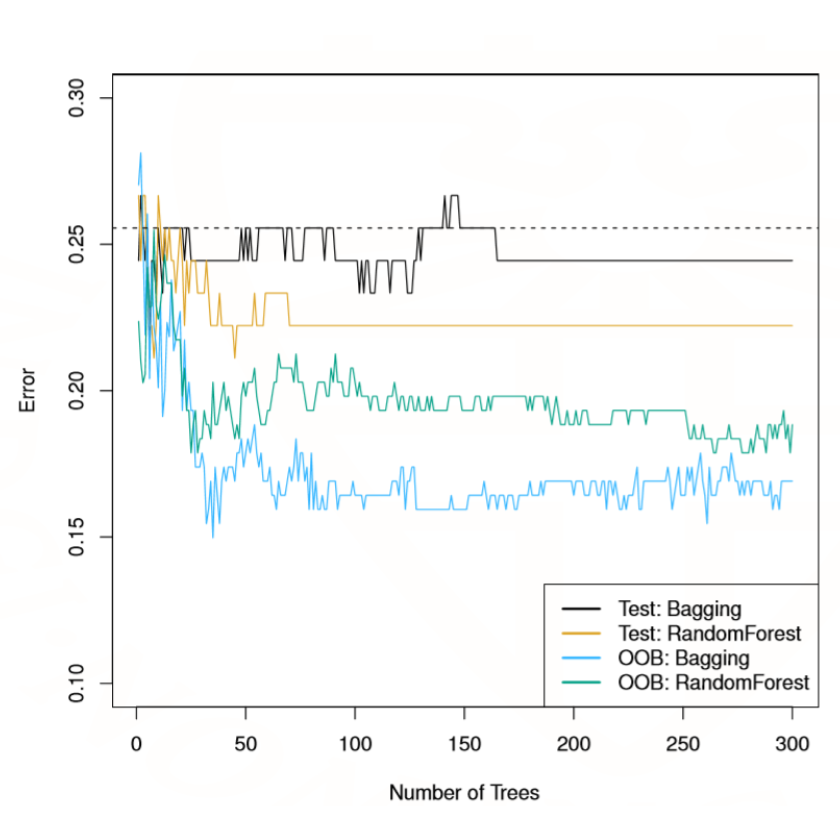

In [44]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen22.png'), width=1)

### Medidas de la Importancia de la Variable

- Bagging tipícamente resulta en una mejora de la precisión sobre la predicción usando un sólo árbol.
<br>

- Desafortunadamente, puede ser díficil de interpretar el modelo resultante.
<br>

- Recordar que una de las ventajas de los árboles de decisión era la facilidad para interpretar el diagrama resultante.
<br>

- Cuando se agregan un gran número de árboles, no es posible representar el procedimiento estadísitico de aprendizaje usando un sólo árbol, y no queda tan claro cuales son las variables más importantes para el procedimiento.
<br>

- En otras palabras, bagging mejora la precisión en la predicción a expensas de la interpretabilidad.

- A pesar de que la colección de árboles agregados es más dificil de interpretar que un solo árbol, es posible obtener un resumen de la importancia de cada predictor usando el índice Gini.
<br>

- El resumen puede obtenerser añadiendo la cantidad total en que el indice de Gini es reducido por las divisiones sobre el predictor, promediado sobre todos los B árboles.

**Gráfica de Importancia de la Variables**

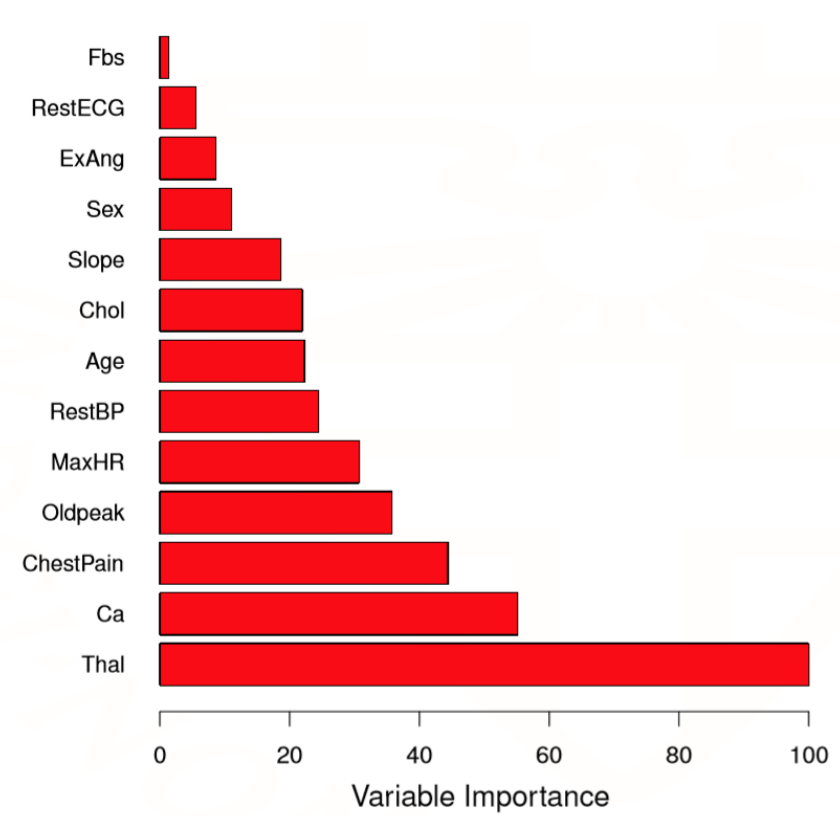

In [45]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen23.png'), width=1)

<a id='part23'></a>
## Random Forest I

- Random Forest proporcionan una mejora sobre los árboles agregados por bagging realizando un pequeño ajuste que descorrelacion a los árboles.
<br>

- De manera similar al bagging, se construye un número de árboles de decisión realizando un bootstrapping de las muestras de entrenamiento.
<br>

- Cuando se construye el árbol de decisión, cada vez que se considera una división, una muestra aleatoria de $m$ predictores es seleccionada como candidatos para la división dentro del conjunto total de p predictores.
<br>

- La división es permitida de usar solamente uno de los m predictores

- Una nueva muestra de m predictores es tomada en cada división, y tipicamente se elige $m\thickapprox \sqrt{p}$. 
<br>

- En otras palabras, en cada división del árbol, el algoritmo no permite que se consideren a la mayoría de los predictores.
<br>

- Si existiera un predictor demasiado fuerte en el conjunto de datos, mientras el resto de los predictores tiene una fuerza moderada, entonces la mayoría de árboles agregados por bagging usarán este predictor al inicio altamente correlacionadas.
<br>

- Como consecuencia la mayoría de loa árboles lucirán similares unos a los otros y las predicciones estarán altamente correlacionadas.
<br>

- Desafortunadamente, promediar muchas cantidades altamente correlacionada no ayudan a conseguir una gran reducción de la varianza.

- En otras palabras, bagging no lógrara una substancial reducción de la varianza en comparación con un solo árbol en situaciones de este tipo.
<br>

- Random Forests supera este problema forzando a que cada partición considere solamente un subconjunto de predictores.
<br>

- En promedio, $(p-m)/p$ de las divisiones no considerarán el predictor más fuerte, de tal forma que otros predictores tienen la oportunidad de ser seleccionados.
<br>

- Podemos pensar en este proceso como una descorrelación de los árboles, haciendo que el promedio de los árboles sea menis variable y más fiables.
<br>

- La principal diferencia entre bagging y random forets es la elección del subconjunto de predictores $m$.

- Si Random Forest es construido con $m = p$ es similar a realizar bagging.
<br>

- Usar un valor pequeño de $m$ en la construcción de random forests será de grán ayuda cuando se tiene una gran cantidad de predictores correlacionados.

**Resultados con Random Forest**

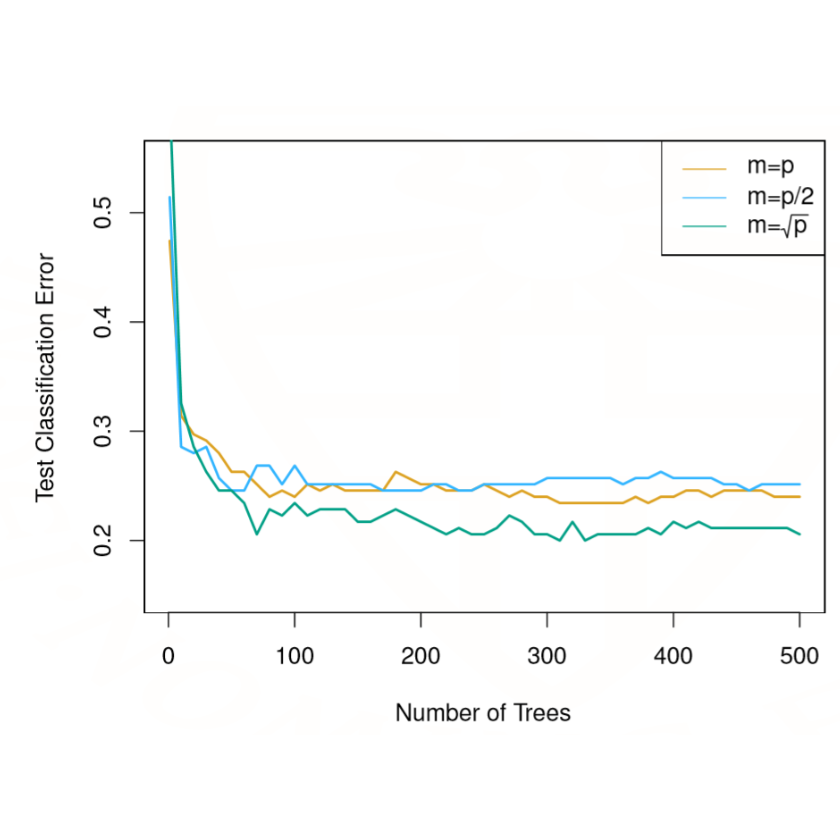

In [46]:
grid.raster(readPNG('D:/R/3. Nivel III/1/imagenes/imagen24.png'), width=1)

<a id='part24'></a>
## Boosting y AdaBoost I

- Boosting y la variante más usada AdaBoost (Adapting Boosting) genera un conjunto de clasificadores.
<br>

- Sin embargo, AdaBoost los genera secuencialmente (Bagging los puede generar en paralelo).
<br>

- A todos los ejemplos, les asigna inicialmente un peso igual $(1/m)$.
<br>

- Cada vez que se genera un clasificador, se cambian los pesos de los nuevos ejemplo usados para le siguiente clasificador. 
<br>

- La idea es forzar al nuevo clasificador a minimizar el error esperado. Para esto se les asigna más peso a los ejemplo mal clasificados y menos a los bien clasificados.

- La idea es alentar crear modelos que se vuelvan "expertos" en los datos que no pudieron ser explicados por los modelos anteriores.
<br>

- Después de cada interacción los pesos reflejan que tan seguido las instancias han sido mal clasificadas por los clasificadores que se tienen hasta el momento.
<br>

- Se generan igual $B$ clasificadores de muestras de ejemplos pesadas. El clasificador final se forma usando un esquema de votación pesado que depende del desempeño de cada clasificador en su conjunto de entrenamiento.
<br>

- Este algoritmo requiere de clasificadores débiles que cambian su estructura con cambios en los datos y que no dan errores mayores al 50%.

- El algoritmo se para cuando el error en los datos de entrenamiento pesados son mayores o iguales a 0.5 o cuando el error es cero (donde todos los pesos de las instacnias se vuelven 0).
<br>

- Si no se pueden incorporar ejemplo pesados dentro del clasificador, se pueden tener un efecto parecido por medio de un muestreo con reemplazo, seleccionando los ejemplo de acuerdo a su peso.
<br>

- Se puede tener problemas de underflow, por lo que es común eliminar ejemplo con los pesos muy pequeños.
<br>

- Bagging sin pruning a veces reduce el error, Boosting sólo lo aumenta

- En Boosting, si un clasificador tiene un error cero, recibe recomenda infinita y es unico ganador, por lo que generalmente se elimina.